In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import nibabel as nib
import cv2
from mlxtend.preprocessing import one_hot
import timeit
from random import shuffle
from MPC_tools import *
from layers import *

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


%matplotlib inline

# Loading Data

In [2]:
base_dir = '/home/cocoan-gpu1/D_drive/MPC/data/SEMIC/numpy_data'

In [3]:
dir_path_list = []
filenames_list = []

for dirpath, dirnames, filenames in os.walk(base_dir):
    if 'model' in dirpath:
        dir_path_list.append(dirpath)

        temp_filenames_list=[]
        for i in range(len(filenames)):
            if 'sub' and 'npy' in filenames[i]:
                temp_filenames_list.append(filenames[i])
        filenames_list.append(temp_filenames_list)
        
dir_path_list = np.array(dir_path_list)
filenames_list = np.array(filenames_list)

In [4]:
dir_path_list

array(['/home/cocoan-gpu1/D_drive/MPC/data/SEMIC/numpy_data/model02_FIR_SPM_SINGLE_TRIAL',
       '/home/cocoan-gpu1/D_drive/MPC/data/SEMIC/numpy_data/model02_Overall_FIR_SPM_SINGLE_TRIAL'],
      dtype='<U88')

In [5]:
filenames_list.shape

(2, 59)

In [6]:
full_path_list = []

for i in range(dir_path_list.shape[0]):
    temp_path_list=[]
    for j in range(len(filenames_list[i])):
        temp_path = os.path.join(dir_path_list[i], filenames_list[i][j])
        temp_path_list.append(temp_path)
    full_path_list.append(temp_path_list)

full_path_list = np.array(full_path_list)

In [7]:
full_path_list[0,5]

'/home/cocoan-gpu1/D_drive/MPC/data/SEMIC/numpy_data/model02_FIR_SPM_SINGLE_TRIAL/model02_FIR_SPM_SINGLE_TRIAL_sub-semic006.npy'

In [8]:
print("{} data loading started ... ".format(filenames_list[0,5]))

start = timeit.default_timer()

X_stim = np.load(full_path_list[0,5])

stop = timeit.default_timer()
check_time = stop-start
now = datetime.datetime.now()
print("###  Duration Time  : {} minutes   {} seconds      ###".format(int(check_time)//60, int(check_time)%60))
print("###  Excecuted Time : {}     ###".format(now))

model02_FIR_SPM_SINGLE_TRIAL_sub-semic006.npy data loading started ... 
###  Duration Time  : 0 minutes   30 seconds      ###
###  Excecuted Time : 2019-04-13 15:02:47.317741     ###


In [9]:
print("{} data loading started ... ".format(filenames_list[1,5]))

start = timeit.default_timer()

X_control = np.load(full_path_list[1,5])

stop = timeit.default_timer()
check_time = stop-start
now = datetime.datetime.now()
print("###  Duration Time  : {} minutes   {} seconds      ###".format(int(check_time)//60, int(check_time)%60))
print("###  Excecuted Time : {}     ###".format(now))

model02_Overall_FIR_SPM_SINGLE_TRIAL_sub-semic006.npy data loading started ... 
###  Duration Time  : 0 minutes   1 seconds      ###
###  Excecuted Time : 2019-04-13 15:02:48.687944     ###


In [10]:
print(X_stim.shape)
print(X_control.shape)

(6051, 79, 95, 79)
(2271, 79, 95, 79)


In [11]:
stim_index_list = np.arange(0,X_stim.shape[0])
stim_index_list

array([   0,    1,    2, ..., 6048, 6049, 6050])

In [12]:
np.random.shuffle(stim_index_list)

In [13]:
X_stim[stim_index_list[:2271],:,:,:].shape

(2271, 79, 95, 79)

In [14]:
X = np.concatenate((X_stim[stim_index_list[:2271],:,:,:], X_control), axis=0)
X.shape

(4542, 79, 95, 79)

In [15]:
del X_stim
del X_control

In [16]:
Y_stim = np.ones(2271, dtype='i4')

In [17]:
Y_control = np.zeros(2271, dtype='i4')

In [18]:
Y = np.concatenate((Y_stim, Y_control), axis=0)
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [19]:
del Y_stim
del Y_control

In [20]:
Y = one_hot(Y)

In [21]:
Y.shape

(4542, 2)

In [22]:
index = np.arange(0,X.shape[0])
index.shape

(4542,)

In [23]:
np.random.shuffle(index)

In [24]:
index

array([ 101,  524, 3147, ..., 4203,  115, 3583])

In [25]:
X = X[index,:,:,:]
X

array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        ...,

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan

In [26]:
X = X[:,:,:,:,np.newaxis]

In [27]:
X.shape

(4542, 79, 95, 79, 1)

In [28]:
Y = Y[index,:]
Y

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [120]:
X = np.load("/home/cocoan-gpu1/D_drive/MPC/data/SEMIC/SEMIC_sub1to55_num1to50_stim_control_flatten.npy")

In [121]:
X.shape

(5500, 592895)

In [122]:
X = X.reshape(5500, 79, 95, 79)
X.shape

(5500, 79, 95, 79)

In [123]:
X = X[:,:,:,:,np.newaxis]
X.shape

(5500, 79, 95, 79, 1)

In [116]:
Y = pd.read_csv("/home/cocoan-gpu1/D_drive/MPC/data/SEMIC/SEMIC_sub1to55_num1to50_stim_control_pandas.csv")

In [117]:
Y = np.array(Y['0'], dtype='i4')

In [118]:
Y = one_hot(Y)

In [119]:
Y.shape

(5500, 2)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4400, 79, 95, 79, 1)
(1100, 79, 95, 79, 1)
(4400, 2)
(1100, 2)


In [125]:
del X
del Y

In [31]:
'''
X_reshaped = X_train.reshape(4400,-1)
X_test_reshaped = X_test.reshape(1100,-1)
'''

'\nX_reshaped = X_train.reshape(4400,-1)\nX_test_reshaped = X_test.reshape(1100,-1)\n'

# Making tensorflow graph

In [126]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

def neural_net(x, num_classes=2):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.layers.dense(x, n_hidden_1, activation=tf.nn.relu)
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.layers.dense(layer_1, n_hidden_2, activation=tf.nn.relu)
    # Output fully connected layer with a neuron for each class
    out_layer = tf.layers.dense(layer_2, num_classes, activation=tf.nn.sigmoid)
    return out_layer


def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

def batch_norm(data, is_train, name=None):
    return tf.layers.batch_normalization(data, training=is_train, name=name)

In [127]:
# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_classes = 2 

In [128]:
x = tf.placeholder(tf.float32,shape=[None, 79, 95, 79, 1])
y_true = tf.placeholder(tf.float32,shape=[None,num_classes])
is_train = tf.placeholder(tf.bool)
hold_prob = tf.placeholder(tf.float32)

In [129]:
y_pred = neural_net(x, num_classes)

In [130]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))
#cross_entropy = tf.reduce_mean(tf.losses.softmax_cross_entropy(y_true,y_pred))
#cross_entropy = tf.reduce_mean(tf.losses.sigmoid_cross_entropy(y_true,y_pred))

#mse = tf.losses.mean_squared_error(y_true, y_pred)
learning_rate = 1e-7
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(cross_entropy)
init = tf.global_variables_initializer()

# data count

total data = 4542

train data = 3633 = 0:4400

test data = 909 = 0:1100

In [131]:
train_acc_list = []
test_acc_list = []
train_entrop_list = []
test_entrop_list = []
step_list = []

lowest_loss = None

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()

    for i in range(1000):
        j = i%44
        t = i%11
        
        matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))

        acc = tf.reduce_mean(tf.cast(matches,tf.float32))
        
        _, train_entropy, train_accuracy = sess.run([train, cross_entropy, acc], feed_dict={x: X_train[j*5:j*5+5], y_true: y_train[j*5:j*5+5], hold_prob: 0.5, is_train:True})
        
        test_entropy, test_accuracy= sess.run([cross_entropy, acc],feed_dict={x:X_test[t*5:t*5+5], y_true:y_test[t*5:t*5+5], hold_prob:1.0, is_train:False})
        
        # PRINT OUT A MESSAGE EVERY 100 STEPS
        if i%10 == 0:
            print("* * * * * * * * * * * * *")
            print('Currently on step {}'.format(i))
            print('##Train Cross entropy is: {}'.format(train_entropy))
            print('##Train Accuracy is: {}'.format(train_accuracy))
            print('\n')
            print('##Test Cross entropy is: {}'.format(test_entropy))
            print('##Test Accuracy is: {}'.format(test_accuracy))
            
            print("* * * * * * * * * * * * *")
            print('\n')
            
            
        if i == 0:
            train_acc_list = train_accuracy
            test_acc_list = test_accuracy
            train_entrop_list = train_entropy
            test_entrop_list = test_entropy
            step_list = i
        else :
            train_acc_list = np.append(train_acc_list, train_accuracy)
            test_acc_list = np.append(test_acc_list, test_accuracy)
            train_entrop_list = np.append(train_entrop_list, train_entropy)
            test_entrop_list = np.append(test_entrop_list, test_entropy)
            step_list = np.append(step_list, i)

        if lowest_loss == None or lowest_loss > test_entropy:
            lowest_loss = test_entropy
            saver.save(sess, "./model/MPC_dnn_basic_SEMIC_binary_classification_ver2.ckpt")


InvalidArgumentError: Incompatible shapes: [5,95,79,2] vs. [5]
	 [[Node: Equal_21 = Equal[T=DT_INT64, _device="/job:localhost/replica:0/task:0/device:GPU:0"](ArgMax_42, ArgMax_43)]]
	 [[Node: Mean_37/_45 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_302_Mean_37", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Equal_21', defined at:
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/asyncio/base_events.py", line 438, in run_forever
    self._run_once()
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/asyncio/base_events.py", line 1451, in _run_once
    handle._run()
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/tornado/gen.py", line 781, in inner
    self.run()
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/tornado/gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2843, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2869, in _run_cell
    return runner(coro)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3044, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3209, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3291, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-131-fb97c840be4f>", line 17, in <module>
    matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 2649, in equal
    "Equal", x=x, y=y, name=name)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3155, in create_op
    op_def=op_def)
  File "/home/cocoan-gpu1/anaconda3/envs/tf3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): Incompatible shapes: [5,95,79,2] vs. [5]
	 [[Node: Equal_21 = Equal[T=DT_INT64, _device="/job:localhost/replica:0/task:0/device:GPU:0"](ArgMax_42, ArgMax_43)]]
	 [[Node: Mean_37/_45 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_302_Mean_37", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [ ]:
train_acc_list = []
test_acc_list = []
train_entrop_list = []
test_entrop_list = []
step_list = []

lowest_loss = None

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()

    for i in range(1000):
        j = i%44
        t = i%11
        
        matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))

        acc = tf.reduce_mean(tf.cast(matches,tf.float32))
        
        _, train_entropy, train_accuracy = sess.run([train, cross_entropy, acc], feed_dict={x: X_reshaped[j*100:j*100+100], y_true: y_train[j*100:j*100+100], 
                                                                       hold_prob: 0.5, is_train:True})
        
        test_entropy, test_accuracy= sess.run([cross_entropy, acc],feed_dict={x:X_test_reshaped[t*100:t*100+100],y_true:y_test[t*100:t*100+100],
                                                                        hold_prob:1.0, is_train:False})
        
        # PRINT OUT A MESSAGE EVERY 100 STEPS
        if i%10 == 0:
            print("* * * * * * * * * * * * *")
            print('Currently on step {}'.format(i))
            print('##Train Cross entropy is: {}'.format(train_entropy))
            print('##Train Accuracy is: {}'.format(train_accuracy))
            print('\n')
            print('##Test Cross entropy is: {}'.format(test_entropy))
            print('##Test Accuracy is: {}'.format(test_accuracy))
            
            print("* * * * * * * * * * * * *")
            print('\n')
            
            
        if i == 0:
            train_acc_list = train_accuracy
            test_acc_list = test_accuracy
            train_entrop_list = train_entropy
            test_entrop_list = test_entropy
            step_list = i
        else :
            train_acc_list = np.append(train_acc_list, train_accuracy)
            test_acc_list = np.append(test_acc_list, test_accuracy)
            train_entrop_list = np.append(train_entrop_list, train_entropy)
            test_entrop_list = np.append(test_entrop_list, test_entropy)
            step_list = np.append(step_list, i)

        if lowest_loss == None or lowest_loss > test_entropy:
            lowest_loss = test_entropy
            saver.save(sess, "./model/MPC_dnn_basic_SEMIC_ver1.ckpt")


In [ ]:
'''
        if i%10000 == 0:
            learning_rate *= 0.1
            optimizer = tf.train.AdamOptimizer(learning_rate)
            print("learning rate changed {}".format(learning_rate))
            print('\n')
'''

# Visualize result

In [22]:
result_list = pd.DataFrame({"train_acc_list":train_acc_list,"test_acc_list":test_acc_list,"train_entrop_list":train_entrop_list,"test_entrop_list":test_entrop_list,"step":step_list})
result_list.head()

,train_acc_list,test_acc_list,train_entrop_list,test_entrop_list,step
0,0.57,0.53,0.691464,0.699374,0
1,0.53,0.52,0.689165,0.692659,1
2,0.57,0.50,0.687935,0.694601,2
3,0.61,0.56,0.682366,0.688687,3
4,0.59,0.64,0.681297,0.683547,4


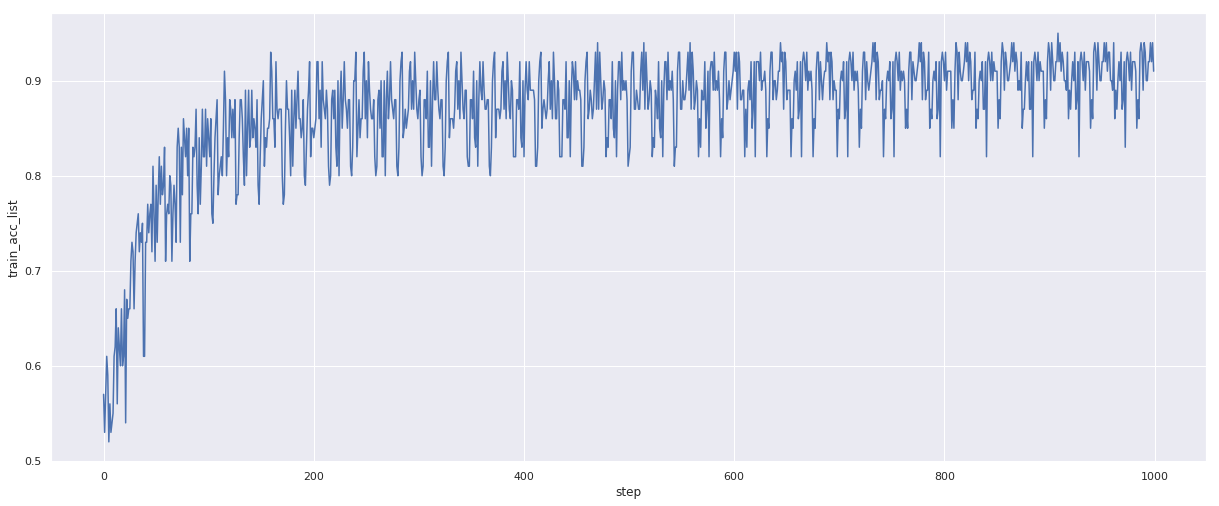

In [23]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.lineplot(x = result_list["step"], y= result_list["train_acc_list"])

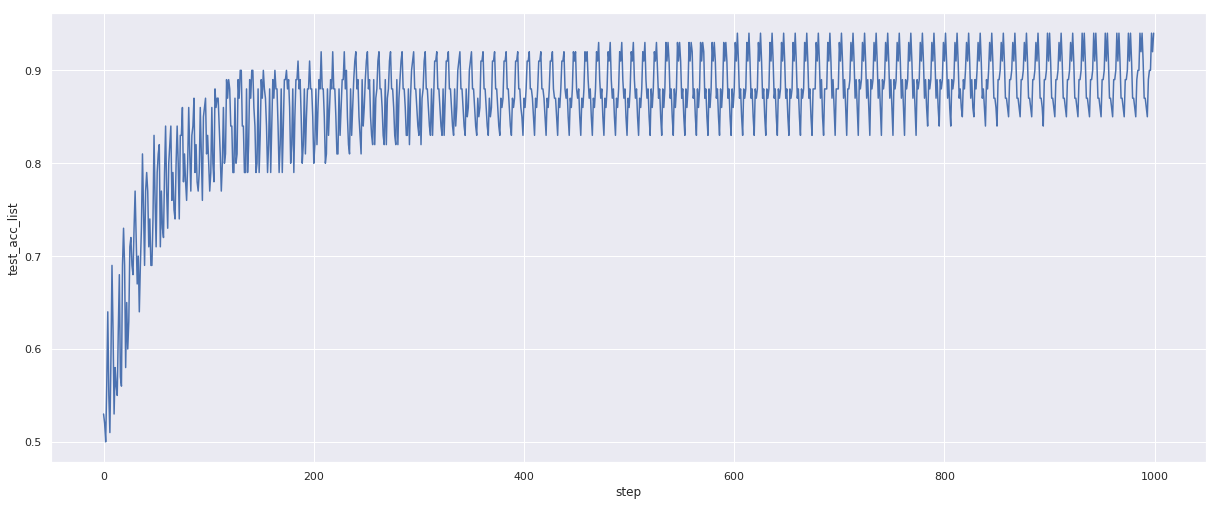

In [24]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.lineplot(x = result_list["step"], y= result_list["test_acc_list"])

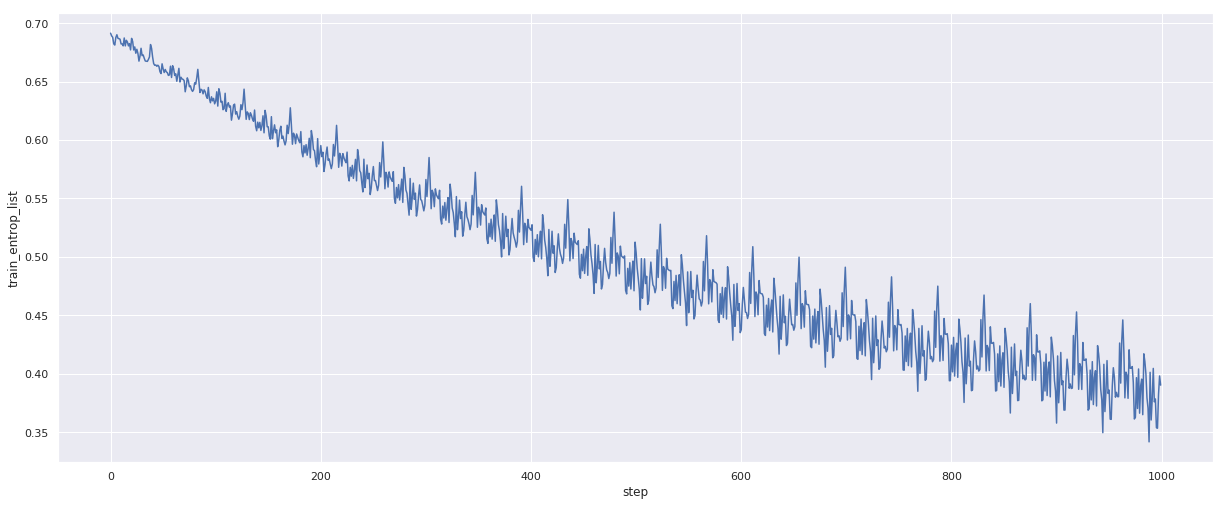

In [25]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.lineplot(x = result_list["step"], y= result_list["train_entrop_list"])

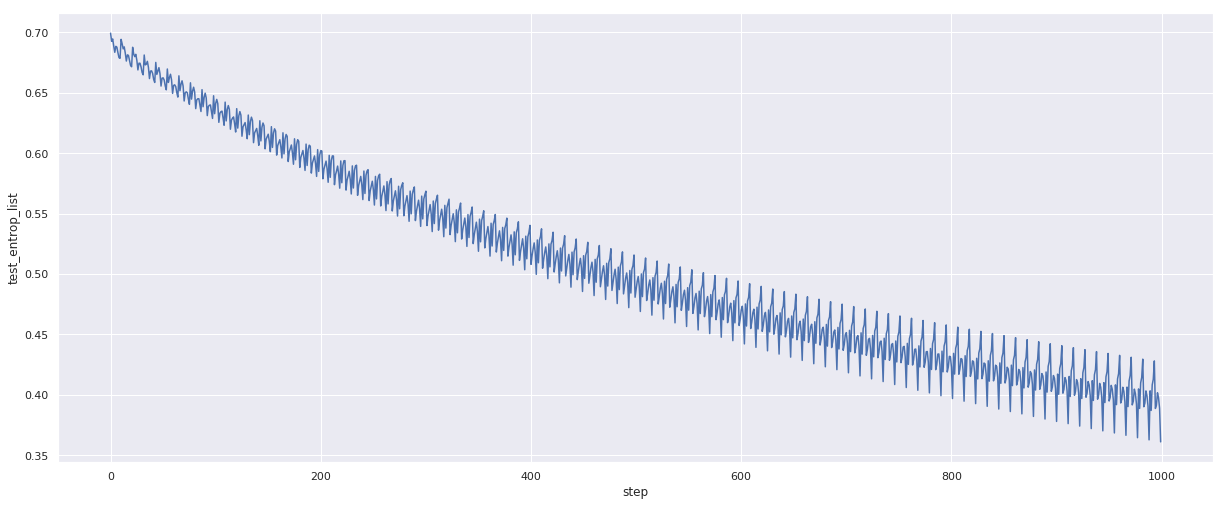

In [26]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.lineplot(x = result_list["step"], y= result_list["test_entrop_list"])